<a href="https://colab.research.google.com/github/Ultan-Kearns/ZTM-Tensorflow-Developer-Certificate/blob/master/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regresion with Neural Networks in Tensorflow
There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter predicting a number

In [76]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

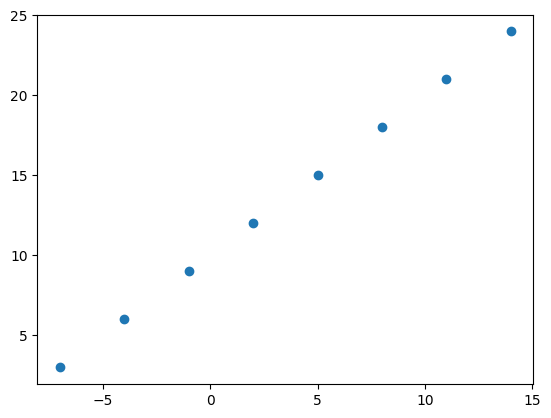

In [77]:
import numpy as np
import matplotlib.pyplot as plt
# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(X,y)

In [78]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [79]:
X[0], y[0]

(-7.0, 3.0)

In [80]:
X[1],y[1]

(-4.0, 6.0)

In [81]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [82]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [83]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [84]:
X[0].ndim

0

In [85]:
X[0],y[0]

(-7.0, 3.0)

In [86]:
# Turn numpy arrays into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y.shape


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 TensorShape([8]))

In [87]:
input_shape = X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

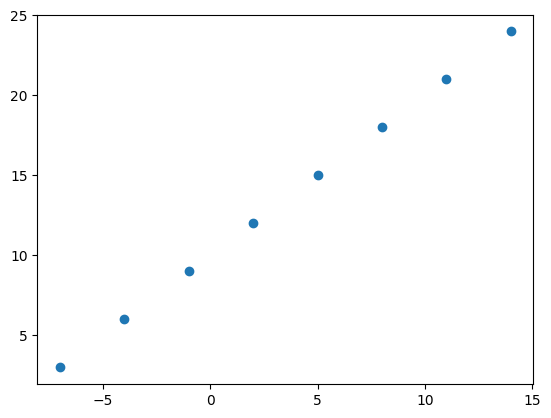

In [88]:
plt.scatter(X,y)

## Steps in modelling with tensorflow
1. Creating a model - define input and output  layers as well as hidden layers of model
2. Compiling a model - define loss function(tells how wrong model is) and the optimizer(improves model and tells us how to improve) evaluation metrics(gauges how well model performs)
3. Fitting the model(where model learns patterns in data)

In [89]:
tf.random.set_seed(42)

In [90]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [91]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line


Epoch 1/5
1/1 [==============================] - 0s 362ms/step - loss: 14.1392 - mae: 14.1392
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 14.0067 - mae: 14.0067
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 13.8742 - mae: 13.8742
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 13.7417 - mae: 13.7417
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 13.6092 - mae: 13.6092


In [92]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [93]:
y_pred = model.predict([11.0])
y_pred

1/1 [==============================] - 0s 69ms/step


array([[-0.03383639]], dtype=float32)

## Improving our model
We can improve our model, by altering the steps we took to create the model

1. creating a model - here we might add more layers, increase hidden units within each hidden layer, change activation func of layers
2. compiling a model - here we might change optimization function or perhaps the learning rate of the optimization function
3. fitting a model - here we might fit a model for more epochs or on more data

In [94]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


Epoch 1/100
1/1 [==============================] - 0s 375ms/step - loss: 18.7196 - mae: 18.7196
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 18.4384 - mae: 18.4384
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 18.1571 - mae: 18.1571
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 17.8759 - mae: 17.8759
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 17.5946 - mae: 17.5946
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 17.3134 - mae: 17.3134
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 17.0321 - mae: 17.0321
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 16.7509 - mae: 16.7509
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 16.4696 - mae: 16.4696
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 16.1884 - mae: 16.1884
Epoch 11/100
1/1 [==============================

In [95]:
# Lets see if pred has improved
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 81ms/step


array([[29.764849]], dtype=float32)

In [96]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


Epoch 1/100
1/1 [==============================] - 1s 662ms/step - loss: 14.1900 - mae: 14.1900
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 13.4949 - mae: 13.4949
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.8012 - mae: 12.8012
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1066 - mae: 12.1066
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.4089 - mae: 11.4089
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 10.7054 - mae: 10.7054
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 9.9929 - mae: 9.9929
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 9.2686 - mae: 9.2686
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 8.5293 - mae: 8.5293
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 7.7718 - mae: 7.7718
Epoch 11/100
1/1 [==============================] - 0s 1

In [97]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [98]:
# Lets see if pred has improved
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 134ms/step


array([[27.446577]], dtype=float32)

## Evaluating a model
In practice, a typical workflow you'll go through when building a neural network is:

``` build a model -> fit it -> evaluate it -> tweak a model -> evaluate it -> repeat

When it comes to evaluation experiment experiment experiment
When it comes to evaluation it's
> visualization, visualization, visualization
It's a good idea to visualize
* The data - imagine what it looks like
* The model itself - what does our model look like?
* The training of a model - how does model perform while it learns?
* The predictions of the model - how do predictions line up with the ground truth

In [99]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [100]:
# Make labels for the datase
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

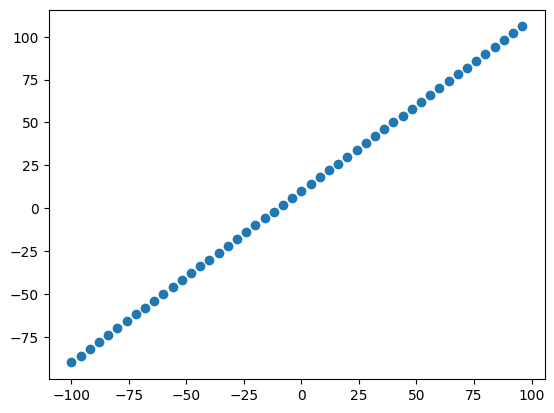

In [101]:
# visualize the data
plt.scatter(X,y)

### The 3 sets....

* **Training** - the model used to train the data, usually 70 - 80 % of the total amount of data
* **Validation** - Used to validate how well the model performs usually around 10% of the total available data
* **Test** - provides an unbiased account of how well the model is performing usually 10 - 15 % of the total available data

We want the model to be able to generalize - performs well on data which the model hasn't seen before and learns generalised patterns within the data

In [102]:
# Check the length of how many samples we have
len(X)

50

In [103]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got the data in training and test sets... let's visualize it again!

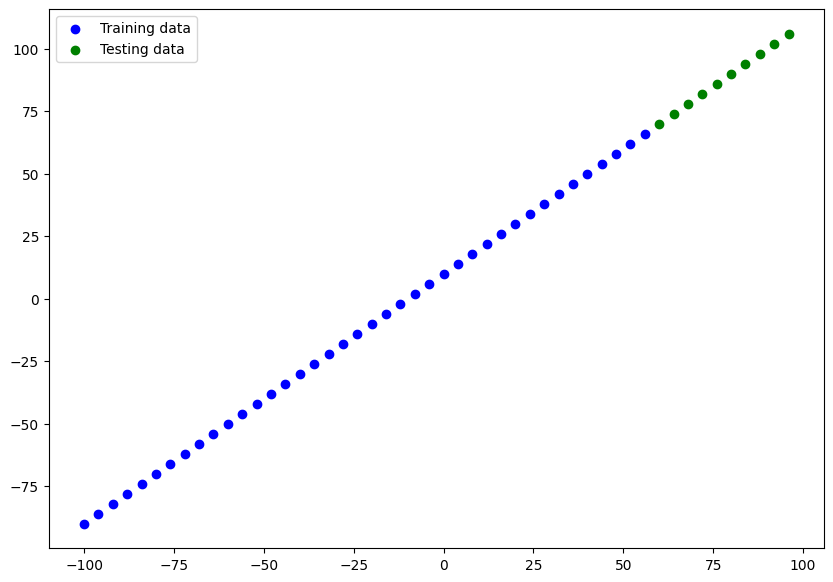

In [104]:
plt.figure(figsize=(10,7))

# plot the training data in blue
plt.scatter(X_train,y_train, c='b',label="Training data")
plt.scatter(X_test, y_test, c="g",label=("Testing data"))
plt.legend()

# Let's have a look at how to build a neural network with our data

In [105]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 110.5860 - mae: 110.5860
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 60.7442 - mae: 60.7442
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 17.4582 - mae: 17.4582
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1439 - mae: 10.1439
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 15.4612 - mae: 15.4612
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.7436 - mae: 11.7436
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 9.2498 - mae: 9.2498
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 12.0256 - mae: 12.0256
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0722 - mae: 10.0722
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1186 - mae: 10.1186
Epoch 11/100
2/2 [==============================] - 0s 7m

# Visualizing the model

In [106]:
model.build()

In [107]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [109]:
# let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)
# create a model same as above
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,name="output_layer")
], name="One_of_the_many_models_we_will_build")
# compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),metrics=["mae"])
#fit the model
model.summary()

Model: "One_of_the_many_models_we_will_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total parameters** - total nums of parameters in the model
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains
* **Non-trainable params** - these parameters aren't updated during training(this usually occurs during transfer learning)

** Resource ** For more in depth overview of trainable parameters within a layer checkout MIT's intro to deep-learning video http://introtodeeplearning.com/

In [110]:
# lets fit our model to the training data
model.fit(X_train,y_train, epochs=100, verbose=0)

In [111]:
model.summary()

Model: "One_of_the_many_models_we_will_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Visualizing the model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test`or `y_true`vs `y_pred`(ground truth versus models prediction's)

In [112]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 71ms/step


array([[ 73.62611 ],
       [ 78.46244 ],
       [ 83.29877 ],
       [ 88.13509 ],
       [ 92.97142 ],
       [ 97.807755],
       [102.64408 ],
       [107.480415],
       [112.31674 ],
       [117.153076]], dtype=float32)

In [113]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note** if you feel like you're going to reuse a piece of code turn it into function

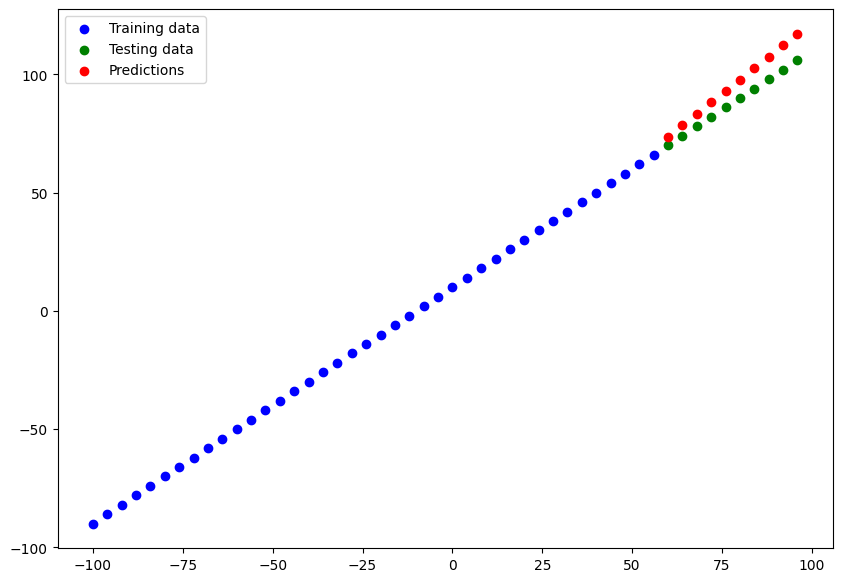

In [114]:
# let's create a plotting function
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
  """
  Plots training data, test data, and compares predictions to ground truth
  """
  plt.figure(figsize=[10,7])
  # Training data
  plt.scatter(train_data,train_labels,c="blue",label="Training data")
  # Test data
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # plot predictions
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend()
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test, predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.  

Since we're working on regression problems, two of the main metrics we will use are:

* MAE - mean absolute error: on average, how wrong are our predictions
* MSE - mean squared error: square of average errors

In [115]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 183ms/step - loss: 7.3896 - mae: 7.3896


[7.389589786529541, 7.389589786529541]

In [116]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.constant(y_pred))
print(mae)

tf.Tensor(
[15.099115 12.215024 10.540247 10.       10.594284 12.323102 15.315265
 19.480415 24.316742 29.153076], shape=(10,), dtype=float32)


In [117]:
y_pred

array([[ 73.62611 ],
       [ 78.46244 ],
       [ 83.29877 ],
       [ 88.13509 ],
       [ 92.97142 ],
       [ 97.807755],
       [102.64408 ],
       [107.480415],
       [112.31674 ],
       [117.153076]], dtype=float32)

In [118]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [119]:
# needed to be done for both mae and mse as they weren't of the same shame(10,1) for y_pred vs (10,) for y_test
y_pred = tf.squeeze(y_pred)

In [120]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.constant(y_pred))
print(mse)

tf.Tensor(60.376476, shape=(), dtype=float32)


In [121]:
def mean_absolute_error(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(tf.constant(y_pred)))

def mean_squared_error(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(tf.constant(y_pred)))


### Running experiements to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> repeat
```

1. Get more data - more examples for the model to train on
2. Make the model larger (using a more complex model) - this might be adding more layers or units per layer
3. Train for longer number of epochs

Let's do 3 different experiements

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers trained for 100 epochs
3. `model_3` - 2 layers trained for 500 epochs
4.
5.

In [122]:
X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [123]:
X_train,y_train


(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [124]:
X_train = tf.expand_dims(X_train, axis=-1)

In [125]:
X_train

<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56]], dtype=int32)>

In [126]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8602 - mae: 9.8602
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 10.7332 - mae: 10.7332
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 16.4922 - mae: 16.4922
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8115 - mae: 8.8115
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.7140 - mae: 10.7140
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9102 - mae: 9.9102
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.9709 - mae: 8.9709
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0732 - mae: 9.0732
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.7637 - mae: 19.7637
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.6736 - mae: 10.6736
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - los

1/1 [==============================] - 0s 54ms/step


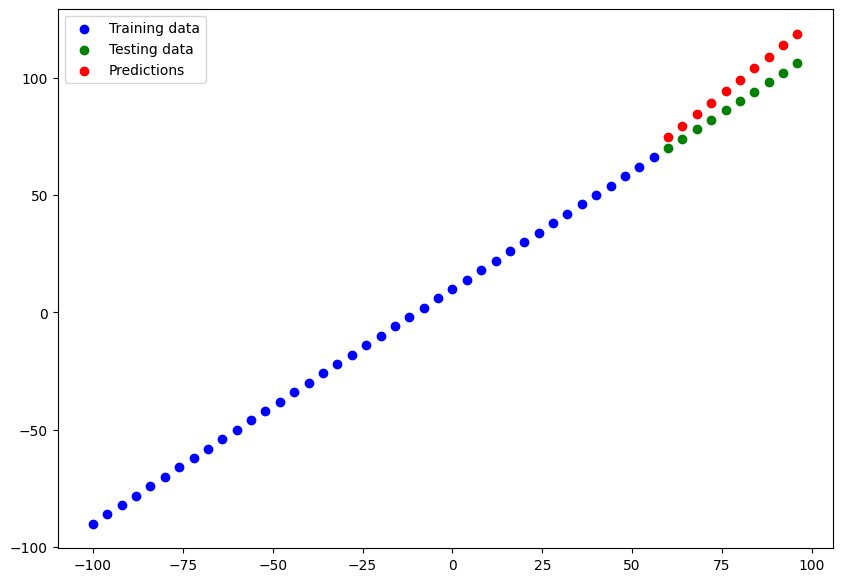

In [127]:
# make and plot predictions for model 1
y_preds_1 = model_1.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_1)

In [128]:
mae_1= mean_absolute_error(y_test,y_preds_1)
mse_1= mean_squared_error(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.624475>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.88871>)

In [129]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mse"])
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 46.3822 - mse: 3207.3896
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 25.7326 - mse: 897.5197
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 29.6101 - mse: 1325.7355
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 16.4745 - mse: 383.8327
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 18.8924 - mse: 513.2958
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 14.7215 - mse: 308.4820
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4037 - mse: 140.8970
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 12.0692 - mse: 197.8885
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 37.7077 - mse: 2190.3931
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 25.3415 - mse: 901.0558
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 89ms/step


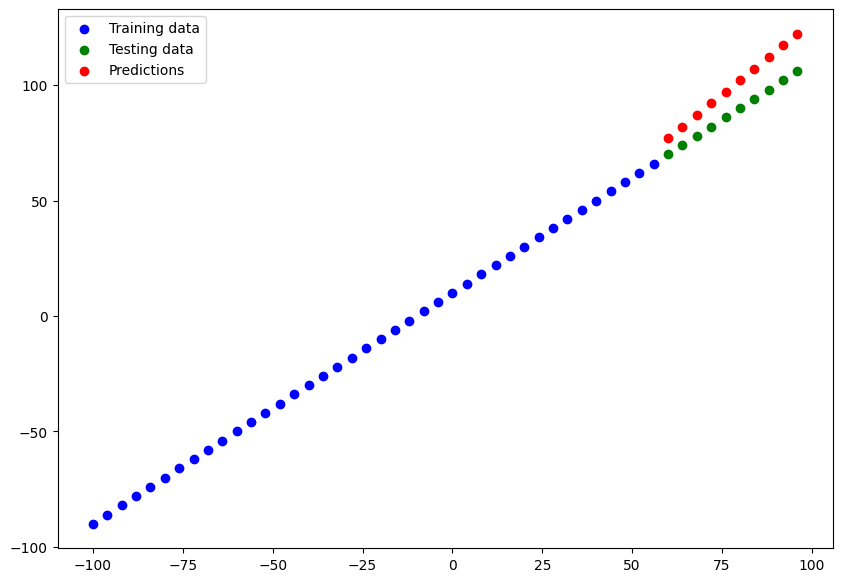

In [130]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_2)

In [131]:
# calculate model 2 evaluation metrics
mae_2 = mean_absolute_error(y_test,y_preds_2)
mse_2 = mean_squared_error(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=11.620806>,
 <tf.Tensor: shape=(), dtype=float32, numpy=143.65686>)

In [132]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mse"])
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 17ms/step - loss: 27.8116 - mse: 1899.9336
Epoch 2/500
2/2 [==============================] - 0s 12ms/step - loss: 24.6709 - mse: 1075.3308
Epoch 3/500
2/2 [==============================] - 0s 13ms/step - loss: 30.8244 - mse: 1400.7053
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 14.7865 - mse: 372.8166
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 22.3893 - mse: 737.5594
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 12.6170 - mse: 205.3921
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.9393 - mse: 177.8368
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 13.1119 - mse: 236.2276
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 34.7646 - mse: 1819.9498
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 24.1352 - mse: 815.4084
Epoch 11/500
2/2 [======================

1/1 [==============================] - 0s 491ms/step


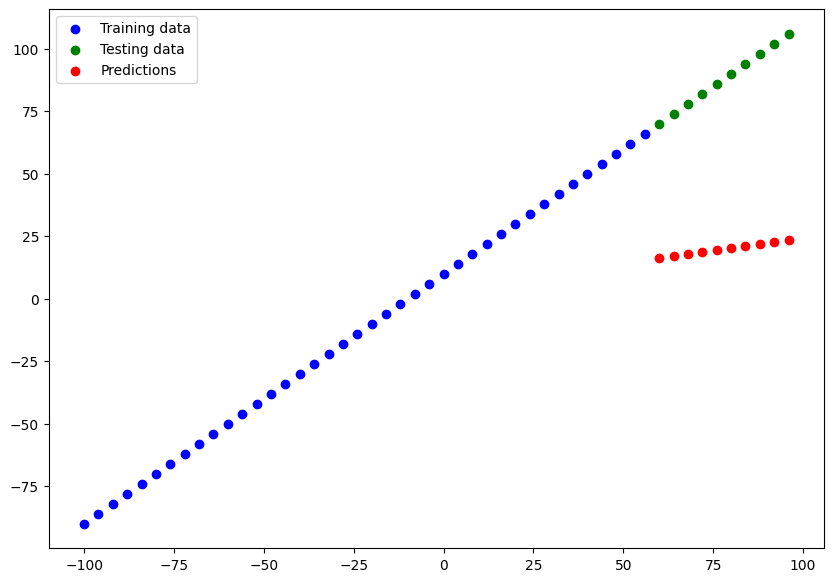

In [133]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_3)

In [134]:
# calculate model 2 evaluation metrics
mae_3 = mean_absolute_error(y_test,y_preds_3)
mse_3 = mean_squared_error(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.90406>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4695.307>)

**Note** You want to start with small experiments - start with small models then scale


### Comparing results of our experiments

We've run a few experiments let's compare the results

In [139]:
import pandas as pd
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],["model_2",mae_2.numpy(),mse_2.numpy()],["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,8.624475,80.888710
1,model_2,11.620806,143.656860
2,model_3,67.904060,4695.307129


``Looks like model 1 performed the best``

In [141]:
model_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The mode experiments you do the more things you'll figure out which don't work and you'll get closer to what does work.  Remember: experiment,experiment,experiment.

## Tracking your experiements

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* Tensorboard - a component of the Tensorflow library to help track modelling experiments(will use later in course)
* Weights & Biases - a tool for tracking all kinds of ML experiments

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as a web application or a mobile application

There are two main formats we can save our model's as:

1. Saved model format
2. The HD5 format

In [144]:
model_1.save('./model_1')
!pwd

/content


In [145]:
model_1.save('./model_1.hdf5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading in a saved model

In [148]:
loaded_saved_model = tf.keras.models.load_model('./model_1')
loaded_saved_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [149]:
model_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [150]:
model_preds = loaded_saved_model.predict(X_test)

1/1 [==============================] - 0s 69ms/step


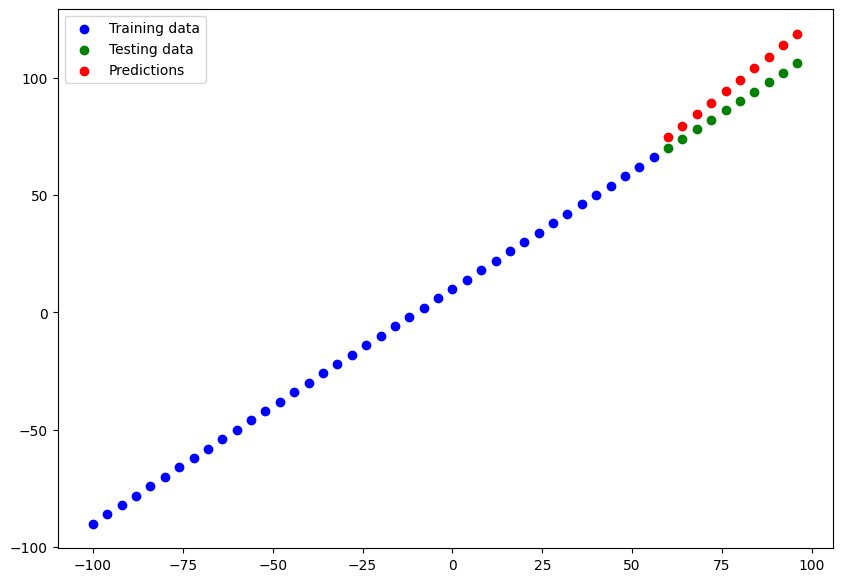

In [151]:
plot_predictions(X_train,y_train,X_test,y_test,model_preds)

In [155]:
y_preds_1 == model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [157]:
mean_absolute_error(y_true=y_test,y_pred=y_preds_1) == mean_absolute_error(y_true= y_test, y_pred = model_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [158]:
model_preds

array([[ 74.62796 ],
       [ 79.516075],
       [ 84.40419 ],
       [ 89.292305],
       [ 94.18042 ],
       [ 99.068535],
       [103.95664 ],
       [108.84476 ],
       [113.73287 ],
       [118.62099 ]], dtype=float32)

In [159]:
y_preds_1

array([[ 74.62796 ],
       [ 79.516075],
       [ 84.40419 ],
       [ 89.292305],
       [ 94.18042 ],
       [ 99.068535],
       [103.95664 ],
       [108.84476 ],
       [113.73287 ],
       [118.62099 ]], dtype=float32)

In [162]:
# load model using h5

loaded_h5_model = tf.keras.models.load_model('./model_1.hdf5')
loaded_h5_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [164]:
model_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [166]:
model_preds_hdf5 = loaded_h5_model.predict(X_test)

1/1 [==============================] - 0s 105ms/step


In [167]:
model_preds_hdf5 == y_preds_1

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])